# Question 1 - Project Training

In [1]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Classification%20Models/project_training.csv"

--2021-11-28 13:50:19--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Classification%20Models/project_training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15511 (15K) [text/plain]
Saving to: ‘project_training.csv’

project_training.cs 100%[===================>]  15.15K  --.-KB/s    in 0s      

2021-11-28 13:50:20 (41.5 MB/s) - ‘project_training.csv’ saved [15511/15511]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project = pd.read_csv("./project_training.csv")

project.head()

,class,x data,y data,z data
0,0,80.543502,41.318858,33.818395
1,0,78.291164,127.006373,41.923430
2,0,121.484717,120.776238,74.294293
3,0,22.123624,70.748242,-17.645028
4,0,63.964959,113.604554,98.920726


In [6]:
# Split data in to labels and data.
labels = project["class"].to_numpy()
data = project.drop(labels=["class"], axis=1).to_numpy()

In [7]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [10]:
# K Nearest Neighbours for 5 different values of k:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

for k in [1, 3, 5, 10, 50]:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_predict = knn.predict(x_test)
    score = f1_score(y_test, y_predict, average="macro")

    print(f"F1 Score for k={k}: {score}")

F1 Score for k=1: 0.9884334925823485
F1 Score for k=3: 0.9595259202971969
F1 Score for k=5: 0.9375411725955205
F1 Score for k=10: 0.9286713286713287
F1 Score for k=50: 0.9002085531936279


We get that the f1 score for k = 1 is better, by quite a significant amount. Taking such a low value for k might lead to overfitting, however as we are working with a test set that the model hasn't seen - this worry is less important!

In [35]:
# Same thing for support vector machines

# K Nearest Neighbours for 5 different values of k:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

for kernel in ["linear", "poly", "rbf", "sigmoid"]:

    svc = SVC(kernel=kernel)
    svc.fit(x_train, y_train)

    y_predict = svc.predict(x_test)
    score = f1_score(y_test, y_predict, average="macro")

    print(f"F1 Score for k={kernel}: {score}")

F1 Score for k=linear: 0.15999999999999998
F1 Score for k=poly: 0.15999999999999998
F1 Score for k=rbf: 0.15999999999999998
F1 Score for k=sigmoid: 0.15999999999999998


Here we see that the linear SVM model is the best. This is good news as it is the most explainable and fastest model.

As for the comparison with KNN, the KNN model is better but might have overfitting. Since we are using a simple linear SVM model it is going to be faster than our KNN model, and may be more suitable as it is less prone to overfitting.

# Question 2 - make_blobs

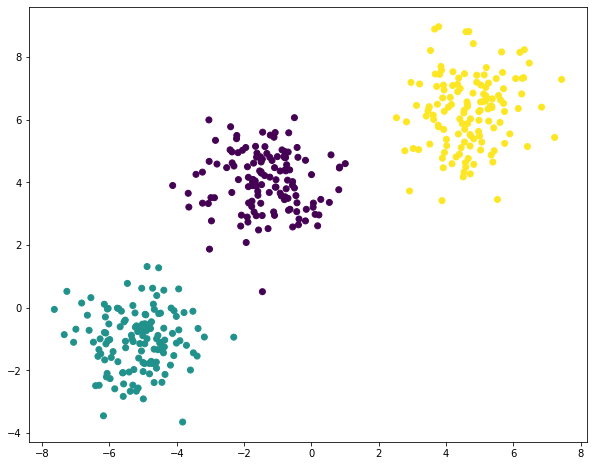

In [13]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=400, centers=3)
points = data[0]
labels = data[1]

fig, ax = plt.subplots(figsize=(10, 8))

x = points[:, 0]
y = points[:, 1]

ax.scatter(x, y, c=labels)

plt.show()

In [15]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(points, labels)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print('F1 Score:', f1_score(y_test, y_predict, average="macro"))

F1 Score: 1.0


Wow! 100% F1 Score! Let's graph the output:

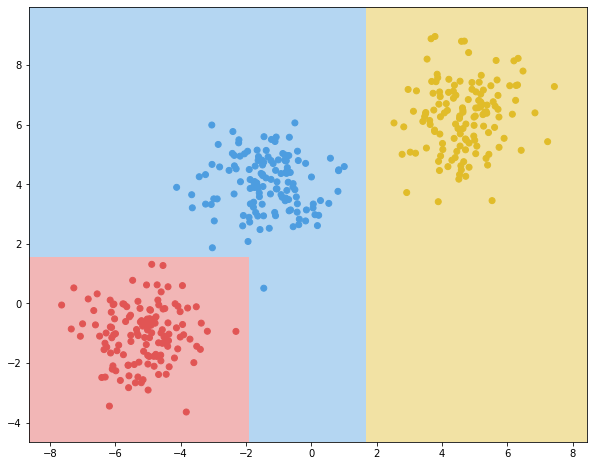

In [16]:
x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

h= 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#4D9DE0', '#E15554', '#E1BC29'])
cmap_light = ListedColormap(['#B4D6F2', '#F2B6B6', '#F2E2A4'])

fig, ax = plt.subplots(figsize=(10, 8))

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(points[:, 0], points[:, 1], c=labels, cmap = cmap_bold)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

# Problem 2.3 - iris

In [19]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv"

--2021-11-28 14:22:16--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.25K  --.-KB/s    in 0s      

2021-11-28 14:22:17 (21.9 MB/s) - ‘iris.csv’ saved [4351/4351]



In [28]:
iris = pd.read_csv("./iris.csv", index_col=0)

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [29]:
# PROBLEM: The labels need to be numeric
# SOLUTION: As always, pandas has us covered!

codes, uniques = pd.factorize(iris["Species"])

# Numerical mapping
print(codes)

# This gives us the corresponding originals
print(uniques)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Index(['setosa', 'versicolor', 'virginica'], dtype='object')


In [30]:
iris["Encoded Species"] = codes

In [32]:
data = iris.drop(labels=["Species", "Encoded Species"], axis=1).to_numpy()
labels = iris["Encoded Species"].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [40]:
for k in [1, 3, 5, 10, 50]:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_predict = knn.predict(x_test)
    score = f1_score(y_test, y_predict, average="macro")

    print(f"F1 Score for k={k}: {score}")


for kernel in ["linear", "poly", "rbf", "sigmoid"]:

    svc = SVC(kernel=kernel)
    svc.fit(x_train, y_train)

    y_predict = knn.predict(x_test)
    score = f1_score(y_test, y_predict, average="macro")

    print(f"F1 Score for k={kernel}: {score}")

F1 Score for k=1: 1.0
F1 Score for k=3: 1.0
F1 Score for k=5: 1.0
F1 Score for k=10: 1.0
F1 Score for k=50: 0.8917748917748917
F1 Score for k=linear: 0.8917748917748917
F1 Score for k=poly: 0.8917748917748917
F1 Score for k=rbf: 0.8917748917748917
F1 Score for k=sigmoid: 0.8917748917748917


Looks like most of our models are very accurate - this looks good. We should take the simplest one to avoid overfitting, maximisation of performance and interpretability. Therefore SVM with linear kernel is probably best!

In [41]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

--2021-11-28 14:31:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   803KB/s    in 0.2s    

2021-11-28 14:31:34 (803 KB/s) - ‘wdbc.data’ saved [124103/124103]



In [66]:
# Read data
wdbc = pd.read_csv("./wdbc.data")

wdbc.head()

# Ah - so the first row is also data. Let's fix this:


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [68]:
wdbc = pd.read_csv("./wdbc.data", header=None)

wdbc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
# We need to rename the label otherwise indexing becomes hard
wdbc.rename(columns={0: "id", 1: "label"}, inplace=True)

wdbc.head()



,id,label,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
data = wdbc.drop(["id", "label"], axis=1).to_numpy()

labels, uniques = pd.factorize(wdbc["label"])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [79]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

y_predict = svc.predict(x_test)
score = f1_score(y_test, y_predict, average="macro")

print(f"F1 Score for linear kernel: {score}")

F1 Score for linear kernel: 0.9409090909090908


There we have it - we have built a model that has an F1 score of 94% for detecting cancerous tumors!

Some problems with this model:

* We have a "hard border" - meaning that there is a point where a patient with a "very slightly" different tumour gets labelled differently. In practice a graduated approach involving risk factors would be more useful, to catch as many cases as possible.
* We are ignoring clinician experience and advice here by going for a data driven approach. It should be used as a tool, not the "be all end all"!

Real life impact of hyperparameters:

* For different values of k in kNN, we will have a more/less fragmented decision boundary. This will lead to some patients with otherwise "normal" looking tumour being investigated further because an outlier had a malignant tumour. Care needs to be taken to avoid overfitting.
* For different kernels in SVM, the main difference is performance and interpretability. These two factors help clinicans in getting fast results and explaining outputs to patients. With a model with complex kernels it might be a long time before patients get their results!